<h1>Satyam Kale </h1>
<h1>Data Visualization I</h1>

1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.

2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

<h2>Data Preparation</h2>

In [3]:
# import required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# load the inbuilt 'titanic' dataset in dataframe

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# check for null or NA values

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# drop the redundant and irrelevant features and records

df.drop(['deck'], axis=1, inplace=True)
df.dropna(inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


<h2>Distribution of fare</h2>

<Axes: xlabel='fare', ylabel='Count'>

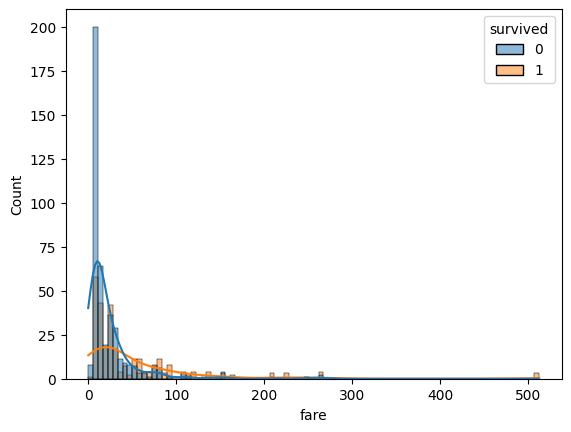

In [7]:
sns.histplot(data=df, x='fare', kde=True, hue='survived')

<Axes: ylabel='fare'>

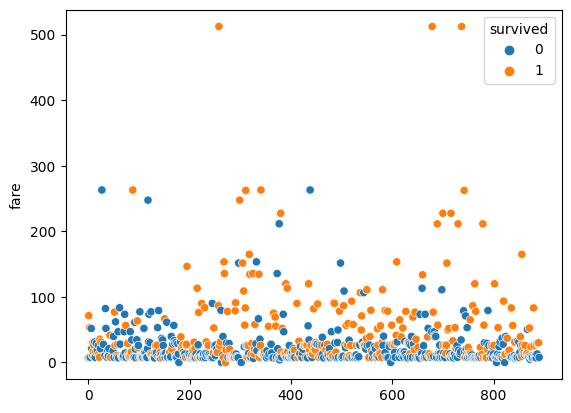

In [8]:
sns.scatterplot(data=df, x=df.index, y='fare', hue='survived')

<h2>Inference :</h2>

The distribution of fare is highly skewed. The frequency distribution shows that it is a right-skewed curve.

People who paid fare less than 40 have very high relative death count, while people who paid fare more than 40 have low relative death count.

<h2>Relation between Class and Survival Rate of the passengers</h2>

<Axes: xlabel='class', ylabel='count'>

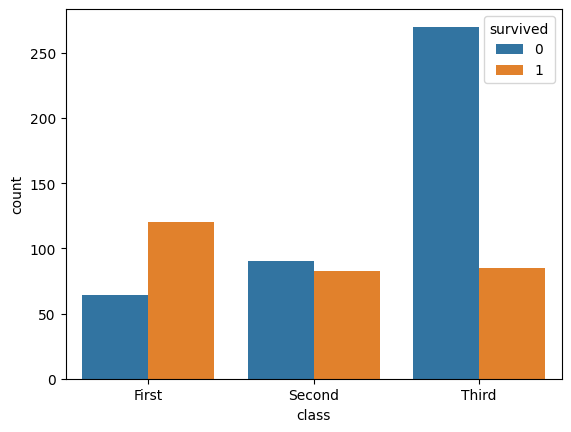

In [10]:
sns.countplot(data=df, x="class", hue='survived')

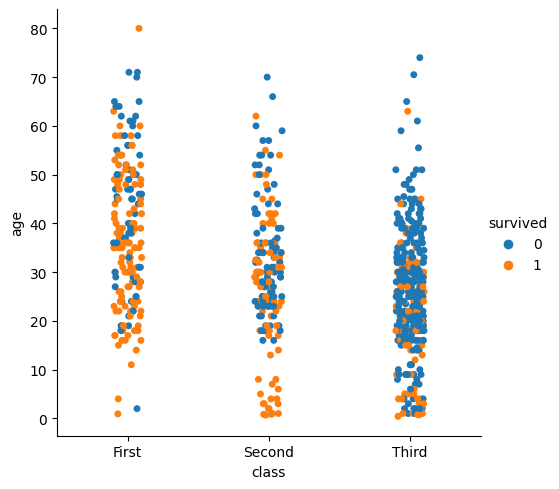

In [11]:
sns.catplot(data=df, x="class", y="age", hue='survived')

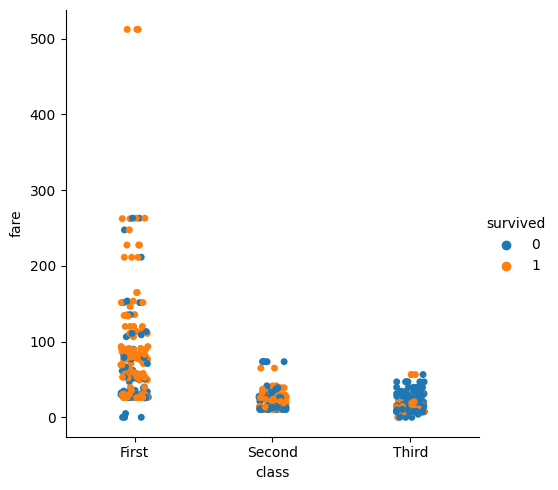

In [12]:
sns.catplot(data=df, x="class", y="fare", hue='survived')

In [13]:
first_class_survived=df.loc[df['class'] == 'First']['survived']
first_class_survival_rate = sum(first_class_survived)/len(first_class_survived)*100

second_class_survived=df.loc[df['class'] == 'Second']['survived']
second_class_survival_rate = sum(second_class_survived)/len(second_class_survived)*100

third_class_survived=df.loc[df['class'] == 'Third']['survived']
third_class_survival_rate = sum(third_class_survived)/len(third_class_survived)*100


print('first_class_survival_rate   :', first_class_survival_rate)
print('second_class_survival_rate  :', second_class_survival_rate)
print('third_class_survival_rate   :', third_class_survival_rate)

first_class_survival_rate   : 65.21739130434783
second_class_survival_rate  : 47.97687861271676
third_class_survival_rate   : 23.943661971830984


<h2>Inference :</h2>

While the survival count of all the classes is relatively same, the death count of third class is very high than the other classes.

But the survival rate is decreases proportionally as the qualitative value of the class also decrease.

<h2>Relation between Sex and Survival Rate of the passengers</h2>

<Axes: xlabel='sex', ylabel='count'>

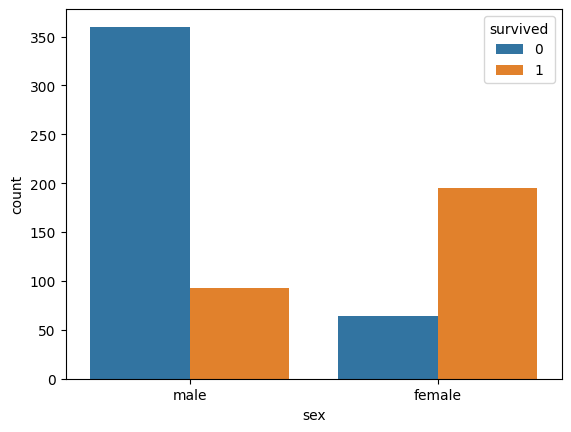

In [14]:
sns.countplot(data=df, x="sex", hue="survived")

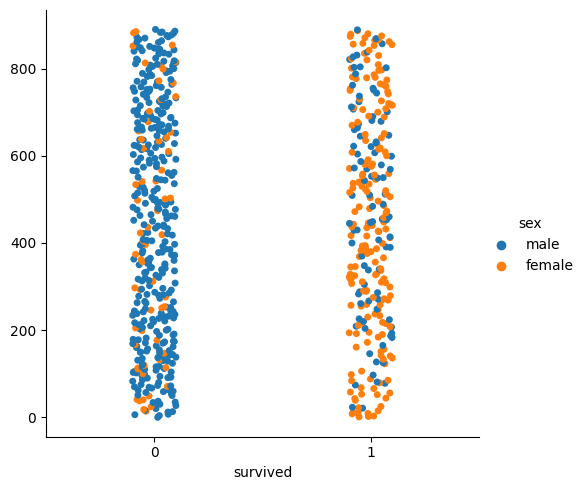

In [15]:
sns.catplot(data=df, x="survived", y=df.index, hue="sex")

In [16]:
male_survived=df.loc[df['sex'] == 'male']['survived']
male_survival_rate = sum(male_survived)/len(male_survived)*100

female_survived=df.loc[df['sex'] == 'female']['survived']
female_survival_rate = sum(female_survived)/len(female_survived)*100

print('male_survival_rate   :', male_survival_rate)
print('female_survival_rate :', female_survival_rate)

male_survival_rate   : 20.52980132450331
female_survival_rate : 75.2895752895753


<h2>Inference :</h2>

The survival count of females is comparatively higher than that of males, and conversely the death count of females is lower than that of males.

Similarly the survival rate of females is higher than that of males.

In [17]:
first_class_survived = df.loc[df['class'] == 'First'][['sex', 'survived']]
first_class_male_survived = first_class_survived.loc[first_class_survived['sex'] == 'male']['survived']
first_class_male_survival_rate = sum(first_class_male_survived)/len(first_class_male_survived)*100
first_class_male_survival_rate

39.603960396039604

<Axes: xlabel='embark_town', ylabel='count'>

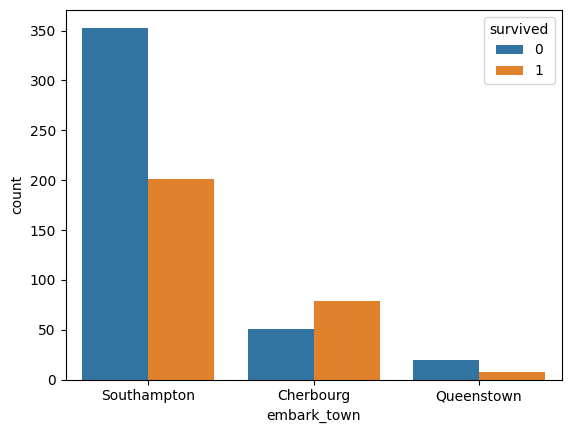

In [18]:
sns.countplot(data=df, x="embark_town", hue="survived")

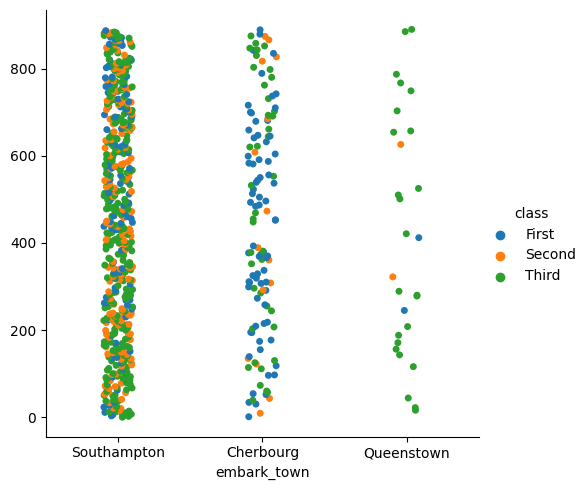

In [19]:
sns.catplot(data=df, x="embark_town", y=df.index, hue="class")

<Axes: xlabel='age', ylabel='Count'>

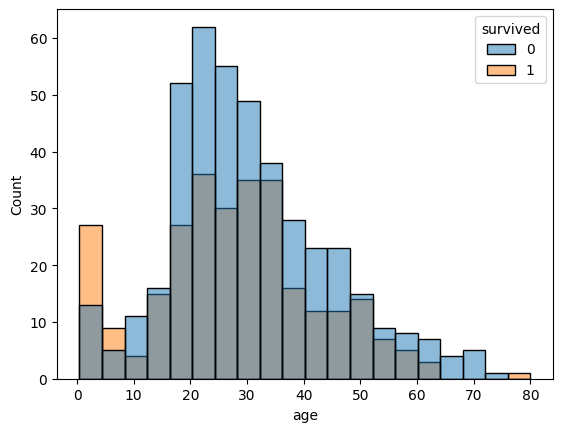

In [20]:
sns.histplot(data=df, x='age', hue='survived')

<h2>Relation between Class, Sex (Who) and Survival Rate of the passengers</h2>

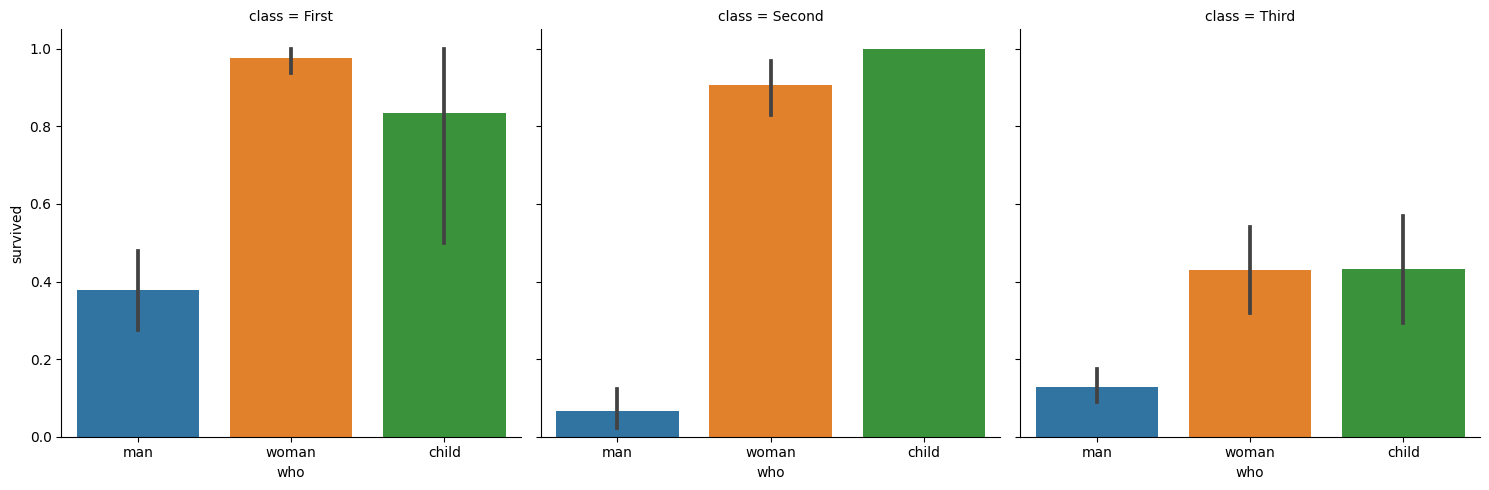

In [21]:
sns.catplot(data=df, x="who", y="survived", col="class", kind="bar")

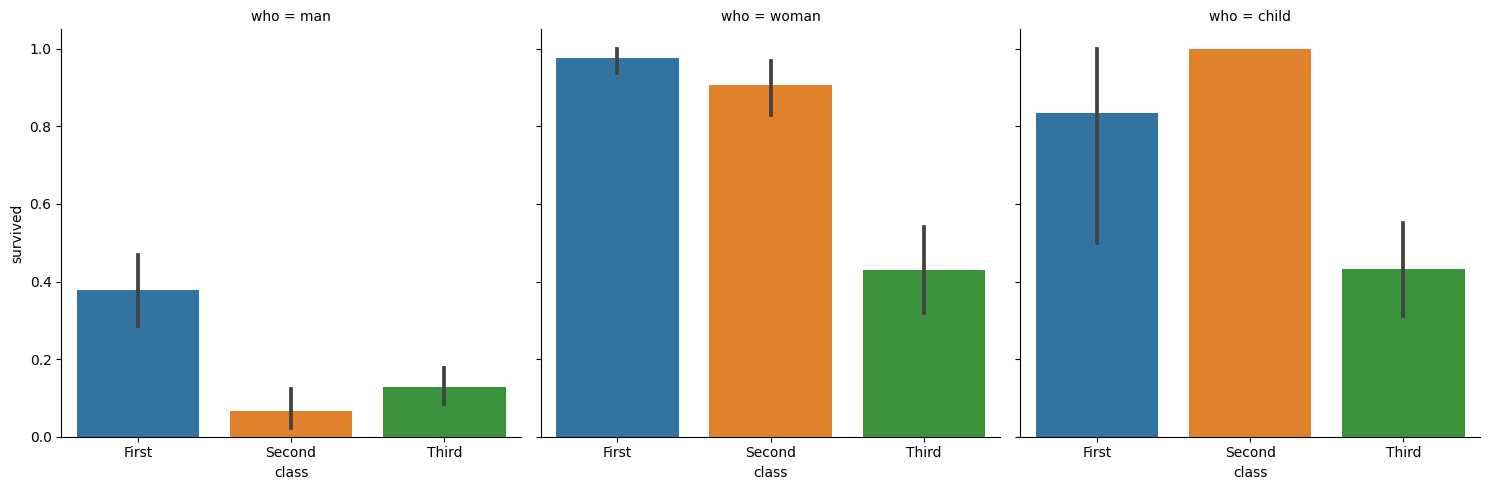

In [22]:
sns.catplot(data=df, x="class", y="survived", col="who", kind="bar")

<Axes: xlabel='sex', ylabel='age'>

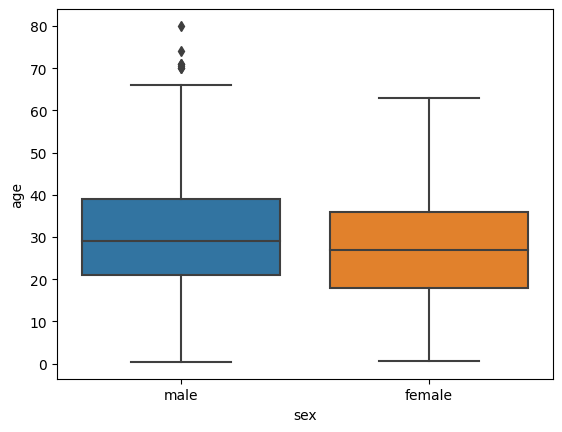

In [23]:
sns.boxplot(data=df, x="sex", y="age")

<Axes: xlabel='sex', ylabel='age'>

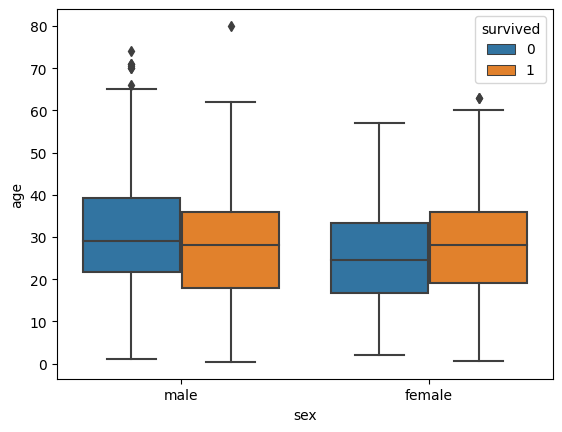

In [24]:
sns.boxplot(data=df, x="sex", y="age", hue="survived")